In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", 
           "exang", "oldpeak", "slope", "ca", "thal", "target"]

data = pd.read_csv(url, names=columns, na_values="?")
data = data.dropna()  # Handle missing values by dropping them for simplicity


In [3]:
X = data.drop("target", axis=1)
y = data["target"].apply(lambda x: 1 if x > 0 else 0)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 68.89%
[[32 17]
 [11 30]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.70        49
           1       0.64      0.73      0.68        41

    accuracy                           0.69        90
   macro avg       0.69      0.69      0.69        90
weighted avg       0.70      0.69      0.69        90



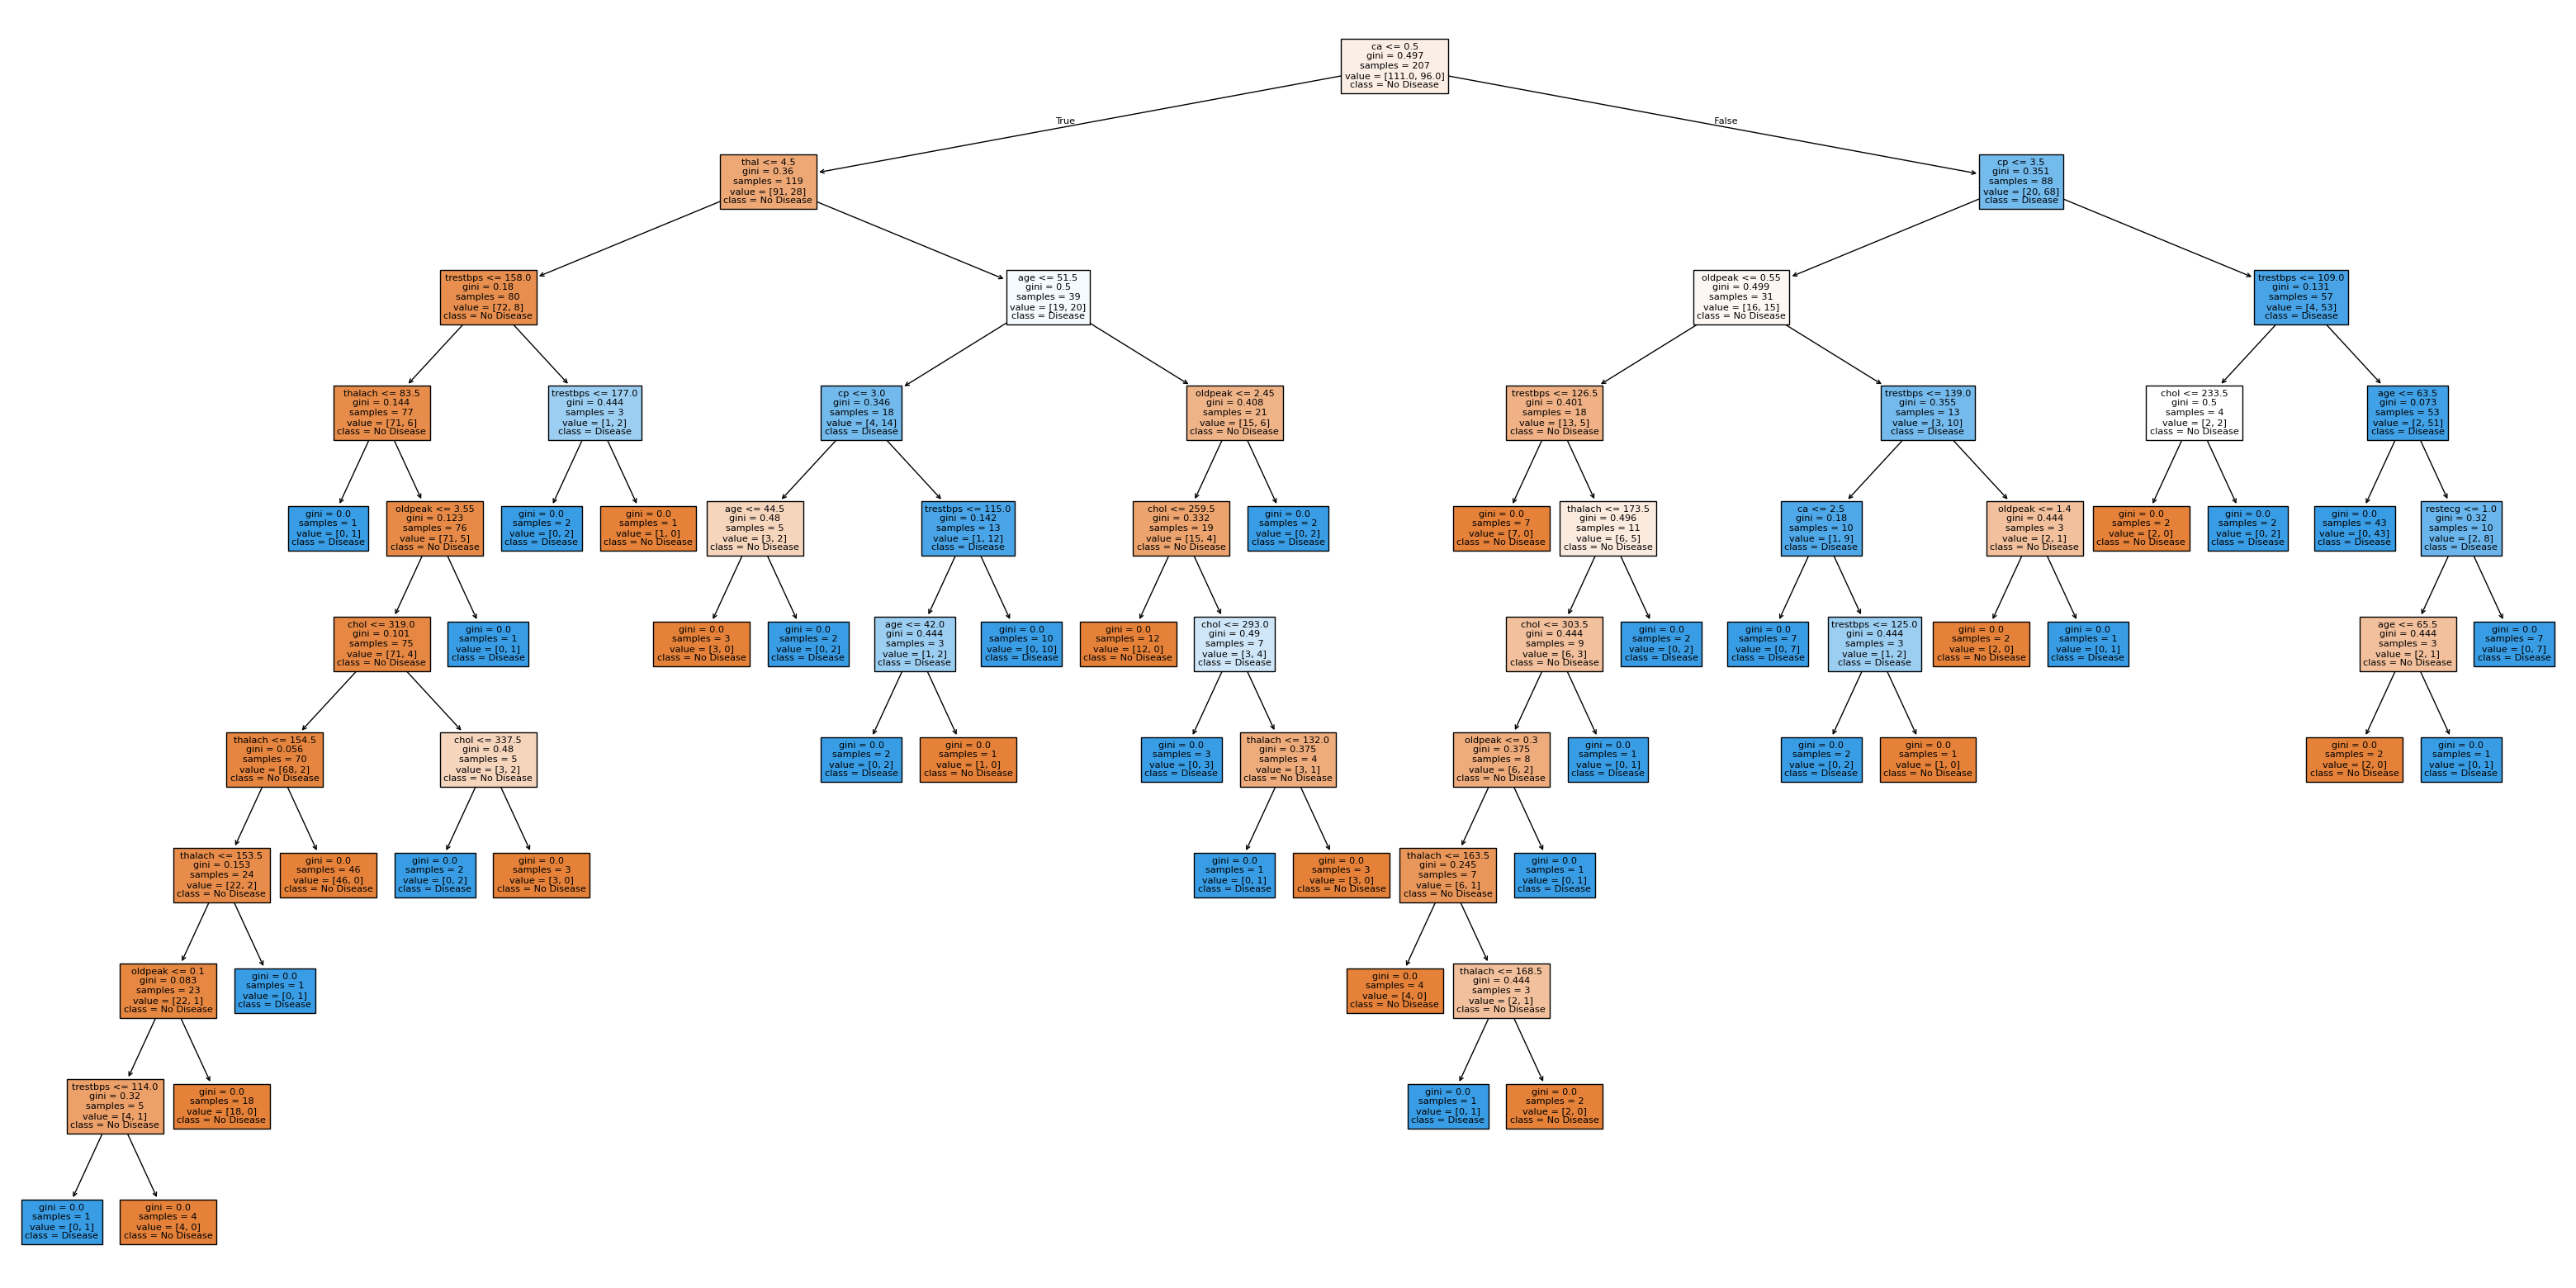

In [14]:
plt.figure(figsize=(40,20))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


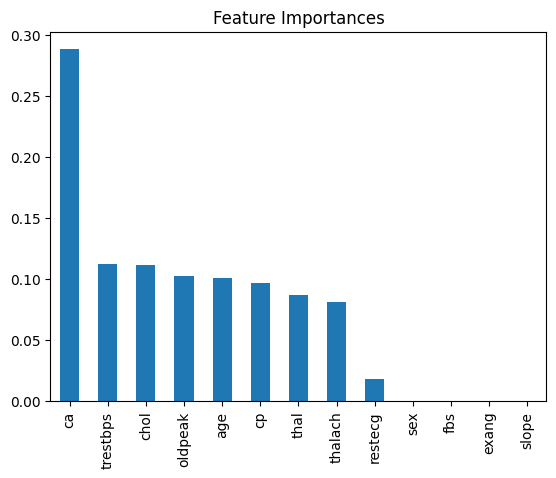

In [12]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importances")
plt.show()
